<a href="https://colab.research.google.com/github/vincent-ondeng-aims/python-programming_group_assignment/blob/main/python_group18_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

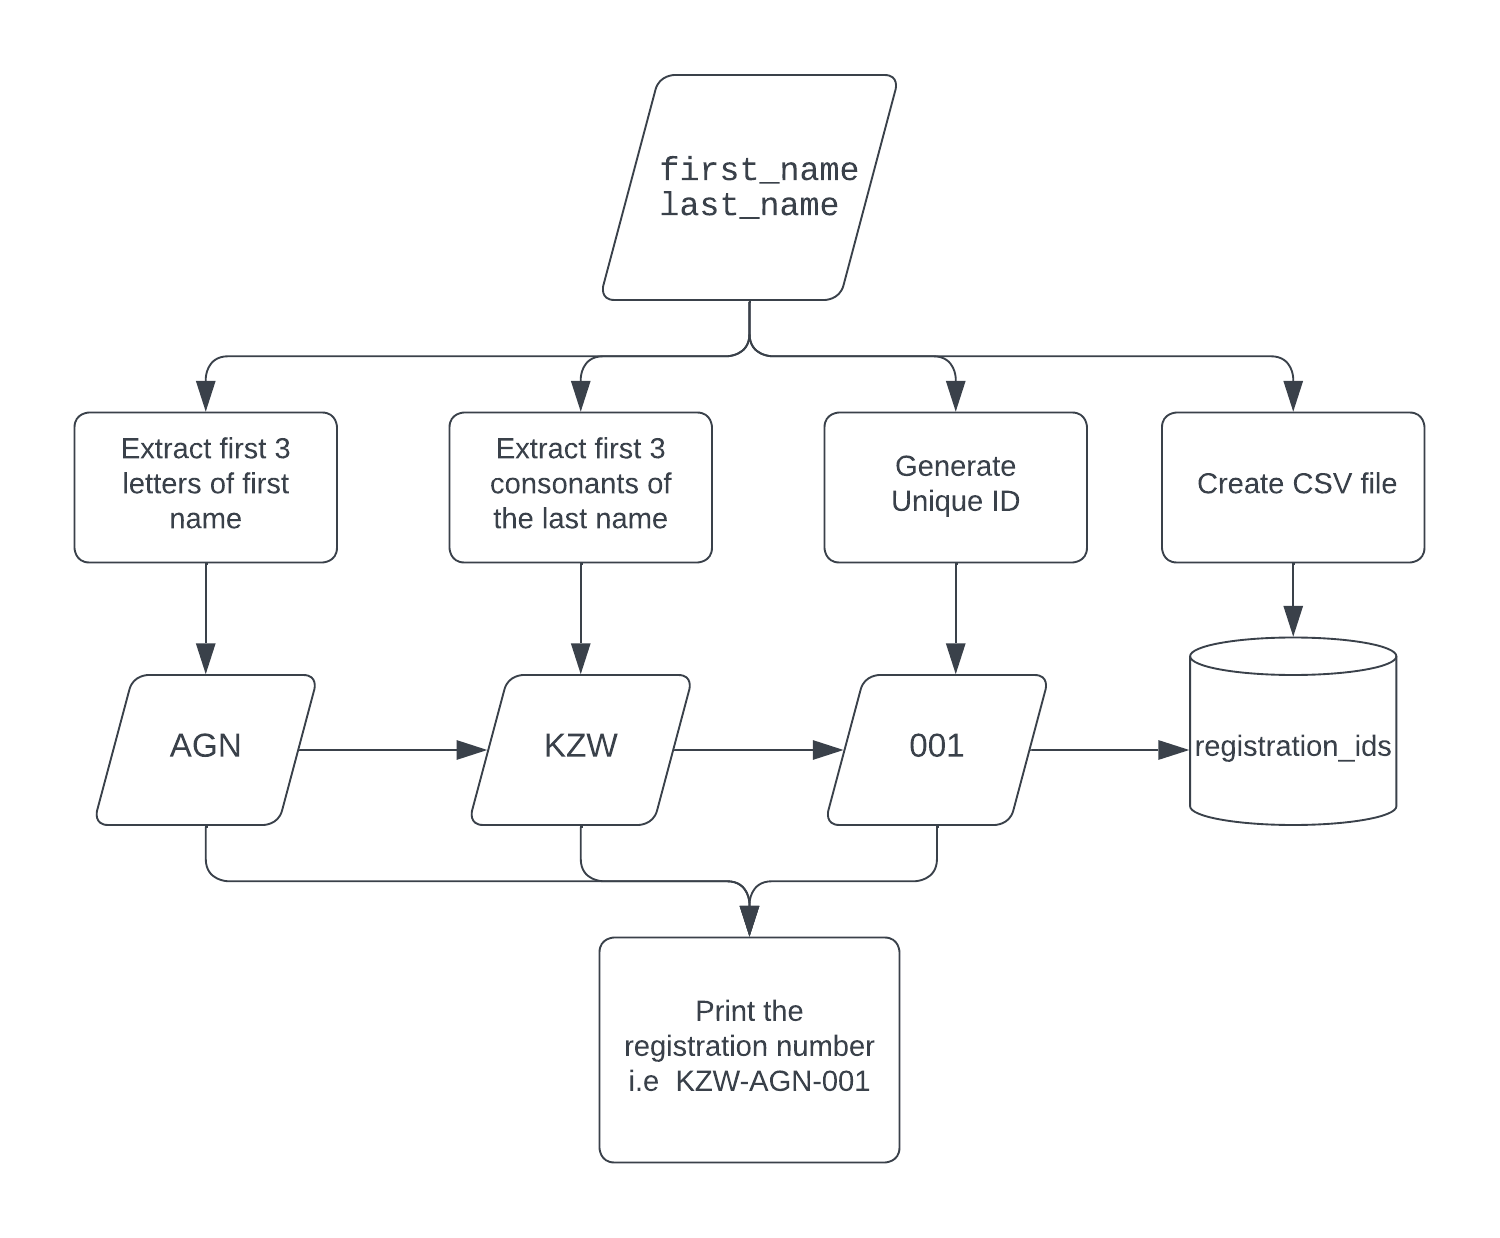

In [ ]:
import csv
import os

In [ ]:
def conson(X):
  """
  This function
  Arguments:

  Return:
  """
  #taking the first three consonants of the last name
  vowels = ["a","e","i","o","u", "A","E","I","O","U"]
  ID1=""
  x=""
  for i in range(len(X)):
      if X[i] not in vowels:
            x=x+X[i]
  if len(x)<3:
        x1=3-len(x)
        x=x+"X"*x1
        ID1=ID1+x
  else:
        ID1=ID1+x[:3]
  return ID1

In [ ]:
def three_letter(Y):
  """
  This function...
  Arguments:
  Return:

  """
    #taking the first three letters of the first name
  Y1=""
  if len(Y)<3:
       x2=3-len(Y)
       Y1=Y+"X"*x2
  else:
       Y1=Y[:3]
  return Y1

In [ ]:
  def verify_list(csv_file, X):
    """
    This function...
    Arguments:
    Return:

    """
    # A function to verify whether an element X is in the CSV file
    existing_ids = set()
    if os.path.exists(csv_file):        # Checks if the csv file exists otherwise it skips this block
        with open(csv_file, mode='r', newline='') as file:     # Open the CSV file in 'r' mode
            reader = csv.reader(file)               #  Function parses the file into rows based on the delimiter (usually a comma in CSV files)
            for row in reader:                      # Iterates through each row in the Csv file
                existing_ids.add(row[0])  # Adds the first value of the row to our empty set (exixting_ids)

    # Check if the ID exists and increment if needed
    while X in existing_ids:
        if (int(X[-1]) + 1) < 10 and int(X[-2]) == 0:
            x33 = "00" + str(int(X[-1]) + 1)
        elif 10 <= int(X[9:]) < 99 and int(X[-3]) == 0:
            x33 = "0" + str(int(X[9:]) + 1)
        elif int(X[8:]) >= 100 and int(X[8:]) < 1000:
            x33 = str(int(X[8:]) + 1)
        X = X.replace(X[8:], x33)
        X = X.upper()

    return existing_ids, X

In [ ]:
  def ID_creation():
    """

    """
    csv_file = 'registration_ids.csv'  # Path to the CSV file
    while True:
        answe = input("If you want to generate an ID, enter 'YES' and if you want to quit, enter 'NO': ")
        if answe == "NO":
            break
        ID = ""
        first_name = input("Enter your first name: ")
        last_name = input("Enter your last name: ")
        X1 = conson(last_name)
        X2 = three_letter(first_name)
        ID = ID + X1 + "-" + X2 + "-" + "001"
        ID = ID.upper()

        # Verify and generate a unique ID
        existing_ids, unique_ID = verify_list(csv_file, ID)

        # Write the unique ID and names to the CSV file
        with open(csv_file, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([unique_ID, first_name, last_name])  # Write ID, first name, last name

        print(unique_ID)

# Run the ID creation function
  ID_creation()

If you want to generate an ID, enter 'YES' and if you want to quit, enter 'NO': NO
